In [1]:
#stl
import os
import warnings
from tqdm import tqdm

#data handling
import pandas as pd
import numpy as np

#stats|
import scipy
import sklearn
#import missingno as mso

#network
import networkx as nx

#vis
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.5)
sns.set_theme()

## Data Preprocessing

In [2]:
data = pd.read_csv("data.csv")
data = data[data.columns[:32]]
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

** let us use the mean features as similarity metrics **

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
from scipy.spatial.distance import pdist, squareform


edge_data = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']].to_numpy()

#using gaussian kernel
# exp(- |x - x'|^2 / std^2)
pairwise_dists = squareform(pdist(edge_data, 'euclidean'))
gauss_kern = np.exp(-pairwise_dists ** 2 / pairwise_dists.std() ** 2)
gauss_kern[0]

array([1.00000000e+00, 4.04891410e-01, 7.04536318e-01, 3.87662076e-02,
       4.72226753e-01, 9.44063775e-02, 9.86219983e-01, 2.14351005e-01,
       1.36560438e-01, 9.33582616e-02, 6.99217086e-01, 6.58801524e-01,
       8.78284085e-01, 6.62310146e-01, 2.15284206e-01, 3.64493156e-01,
       4.21568215e-01, 7.03131170e-01, 5.62719589e-01, 1.96716867e-01,
       1.36747422e-01, 1.05419633e-02, 4.69741343e-01, 2.48756267e-01,
       9.21388190e-01, 9.34869330e-01, 3.35861077e-01, 9.27965624e-01,
       5.36805100e-01, 9.81459328e-01, 9.35586378e-01, 6.70589863e-02,
       9.13163119e-01, 7.99325519e-01, 7.23508331e-01, 8.60486637e-01,
       3.11637952e-01, 1.40744225e-01, 4.54377021e-01, 1.86482647e-01,
       1.91601935e-01, 3.28867756e-02, 9.11448959e-01, 1.67397412e-01,
       1.49988242e-01, 9.52627503e-01, 4.07890194e-03, 1.53890181e-01,
       7.28794378e-02, 1.88807165e-01, 5.91156688e-02, 2.04805714e-01,
       6.50454881e-02, 9.90646462e-01, 4.88369144e-01, 4.89400598e-02,
      

In [6]:
G = nx.from_numpy_matrix(gauss_kern)
G.remove_edges_from(nx.selfloop_edges(G))
print("nodes:", len(G.nodes))
print("edges:", len(G.edges))

nodes: 569
edges: 161596


len: 161596
top 35 percent of edges: 56558.6
range (min, max): (1.9613509166359726e-21, 0.9999979130941485)
mean: 0.5192807450904305
std: 0.38050678097822654


Text(0.5, 1.0, 'Distribution of all Edges')

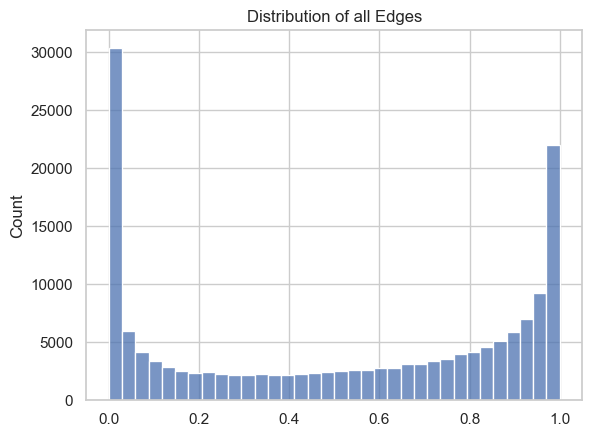

In [7]:
edge_val = [attrs["weight"] for a, b, attrs in G.edges(data=True)]
print("len:", len(edge_val))


percentage = 0.35

print("top 35 percent of edges: %s" % (percentage * len(edge_val)))

print("range (min, max): (%s, %s)" % (min(edge_val), max(edge_val)))
print("mean: %s" % (sum(edge_val) / len(edge_val)))
print("std: %s" % np.array(edge_val).std())


sns.set_style('whitegrid')
sns.histplot(edge_val)
plt.title("Distribution of all Edges")

In [8]:
ALL_edges = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
TOP_edges = ALL_edges[(161596 - int(percentage * 161596)):]
len(TOP_edges)

56558

len: 56558
range (min, max): (0.8039208303940877, 0.9999979130941485)
mean: 0.9351632721115894
std: 0.05814552399020215


Text(0.5, 1.0, 'Distribution of Top 35% Edges')

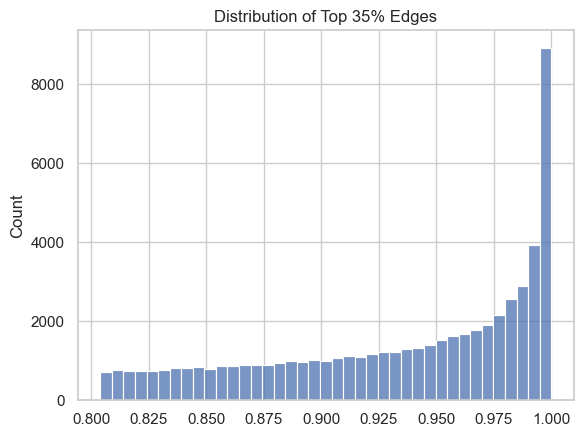

In [9]:
TOP_edge_val = [attrs["weight"] for a, b, attrs in TOP_edges]
print("len:", len(TOP_edge_val))

print("range (min, max): (%s, %s)" % (min(TOP_edge_val), max(TOP_edge_val)))
print("mean: %s" % (sum(TOP_edge_val) / len(TOP_edge_val)))
print("std: %s" % np.array(TOP_edge_val).std())

sns.set_style('whitegrid')
sns.histplot(TOP_edge_val)
plt.title("Distribution of Top 35% Edges")

In [10]:
#remove edges
remove_edges = [i for i in ALL_edges if i not in TOP_edges]
G.remove_edges_from(remove_edges)
print("nodes:", len(G.nodes))
print("edges:", len(G.edges))

nodes: 569
edges: 56558


AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

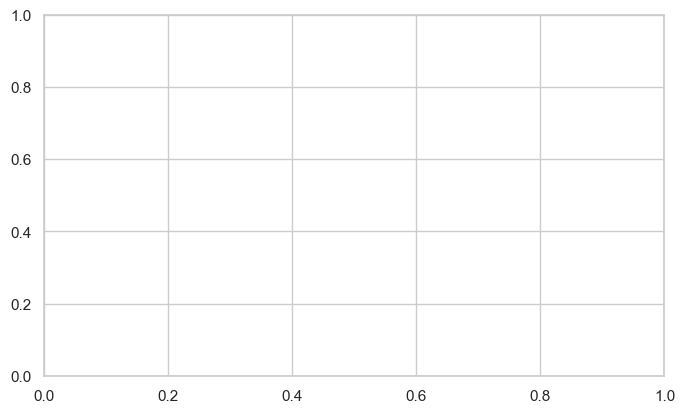

In [11]:
fig = plt.figure(figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(G, seed=10396953)
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
ax.set_title("Connected Components of Top 35% of Edges")
ax.set_axis_off()

** network completed! **

## Model Building - Joint Fusion with MLP + GNN (node classification with DGL)

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.Linear as Linear

from dgl.nn.pytorch import GATConv
from dgl import DGLGraph
import time

In [13]:
class GAT(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GAT, self).__init__()
        self.GAT1 = GATConv(in_feats, h_feats, num_heads = 8, allow_zero_in_degree = True)
        self.GAT2 = GATConv(h_feats * 8, h_feats, num_heads = 1, allow_zero_in_degree = True)

    def forward(self, g, in_feat):
        h = self.GAT1(g, in_feat)
        h = F.relu(h)
        
        #CONCATENATE THE OUTPUTS FROM EACH ATTENTION LAYER
        #h.shape = (num_nodes, 8, h_feats)
        #concate 8xh_feats to get (num_nodes, 8*h_feats)
        
        h = torch.reshape(h, (in_feat.shape[0],-1) )
        h = self.GAT2(g, h)
        
        #return final representation
        return h

In [14]:
class MLP(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(MLP, self).__init__()
        self.lin1 = Linear(in_features = in_feats, out_features = h_feats)
        self.lin2 = Linear(in_features = in_feats, out_features = h_feats)
        
    def forward(self, in_feat):
        h = self.lin1(in_feat)
        h = F.relu(h)
        
        h = self.lin2(in_feat)
        
        #return final representation
        return h        

In [ ]:
class Joint_Fusion(torch.nn.Module):
    def __init__(self, h_feats, num_classes, MLP, GNN):
        super(Joint_Fusion, self).__init__()
        self.GNN = GNN
        self.MLP = MLP
        
        self.classifier1 = Linear(in_features = h_feats * 2, out_features = h_feats)
        self.classifier2 = Linear(in_features = h_feats, out_features = num_classes)

    def forward(self, g, in_feat):
        
        GNN_feats = self.GNN(g, in_feat)
        MLP_feats = self.MLP(in_feat)
        
        combined = torch.cat([GNN_feats, MLP_feats], dim=1)
        
        h = self.classifier1(combined)
        h = F.relu(h)
        
        h = self.classifier2(combined)
        #return final representation, without 
        return h      

## Model Training - 5-fold Stratified CV

mean of each fold is the metrics